In [1]:
#Start with required inputs and data initialisation:
import pandas as pd
import numpy as np
import tensorflow as tf
ds=pd.read_csv("dataset.csv")

In [2]:
ds.shape

(538, 23)

In [3]:
#lets split the data
from sklearn.model_selection import train_test_split
train_df, temp_df=train_test_split(ds,train_size=0.6, test_size=0.4, random_state=72)
val_df,test_df=train_test_split(temp_df,train_size=0.5,test_size=0.5,random_state=17)


In [4]:
train_df.shape

(322, 23)

In [5]:
test_df.shape

(108, 23)

In [6]:
val_df.shape

(108, 23)

In [7]:
y_train=train_df['Adsorption (cc/g)']
y_val=val_df['Adsorption (cc/g)']
x_train=train_df[['Pressure (kPa) ','Ash (%)','Moisture(%)','Volatile matter (%)','Fixed Carbon (%)']]
x_val=val_df[['Pressure (kPa) ','Ash (%)','Moisture(%)','Volatile matter (%)','Fixed Carbon (%)']]

In [8]:
def model_zero(no_features):
    model=tf.keras.models.Sequential([
        tf.keras.Input(shape=(no_features,)),
        tf.keras.layers.Dense(32,activation='relu'),
        tf.keras.layers.Dense(8,activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(
        loss=tf.keras.losses.MeanSquaredError(), # also can use 'mse'
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
        metrics=['mae', tf.keras.metrics.RootMeanSquaredError()]
    )
    return model

In [9]:
no_features=x_train.shape[1]
model=model_zero(no_features)
history=model.fit(
    x_train,
    y_train,
    epochs=20,
    validation_data=(x_val,y_val)
)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.0000e+00 - loss: 10692.9834 - val_accuracy: 0.0000e+00 - val_loss: 7409.0020
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0000e+00 - loss: 2780.9089 - val_accuracy: 0.0000e+00 - val_loss: 1201.8729
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0000e+00 - loss: 1078.6686 - val_accuracy: 0.0000e+00 - val_loss: 63.8913
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0000e+00 - loss: 310.4948 - val_accuracy: 0.0000e+00 - val_loss: 36.3055
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.0000e+00 - loss: 112.9617 - val_accuracy: 0.0000e+00 - val_loss: 33.7526
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0000e+00 - loss: 50.3776 - val_accuracy: 0.0000e+00 - val_loss: 31.3276
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0000e+00 - loss: 40.5556 - val_accuracy: 0.0000e+00 - val_loss: 28.2809
Epoch 8/20
11/11 ━━━━━━━━━━━

In [11]:
# using standardisation
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(test_df[['Pressure (kPa) ','Ash (%)','Moisture(%)','Volatile matter (%)','Fixed Carbon (%)']])

In [13]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20, s
    restore_best_weights=True
)

history = model.fit(
    x_train_scaled, y_train,
    epochs=500,
    validation_data=(x_val_scaled, y_val),
    callbacks=[callback],
    verbose=1
)

Epoch 1/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 85.4084 - mae: 8.1942 - root_mean_squared_error: 9.2417 - val_loss: 76.2912 - val_mae: 7.5159 - val_root_mean_squared_error: 8.7345
Epoch 2/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 46.8092 - mae: 5.7613 - root_mean_squared_error: 6.8417 - val_loss: 25.3981 - val_mae: 4.3551 - val_root_mean_squared_error: 5.0397
Epoch 3/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 16.9247 - mae: 3.2139 - root_mean_squared_error: 4.1140 - val_loss: 16.5432 - val_mae: 3.1177 - val_root_mean_squared_error: 4.0673
Epoch 4/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 11.1838 - mae: 2.5995 - root_mean_squared_error: 3.3442 - val_loss: 9.4772 - val_mae: 2.4090 - val_root_mean_squared_error: 3.0785
Epoch 5/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 8.0281 - mae: 2.3220 - root_mean_squared_error: 2.8334 - val_loss: 8.0971 - val_mae: 2.2529 - val_root_mean_squared_error: 2.8455
Epoch 6/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2

Model                          | MAE        | RMSE       | R2 Score  
----------------------------------------------------------------------
Linear Regression              | 1.3858     | 1.7428     | 0.8356    
Random Forest                  | 0.5294     | 0.7085     | 0.9729    
Support Vector Regressor (SVR) | 0.8000     | 1.1793     | 0.9247    
Gradient Boosting              | 0.3980     | 0.5084     | 0.9860    
K-Nearest Neighbors            | 0.8665     | 1.2685     | 0.9119    


C:\Users\susmi\AppData\Local\Temp\ipykernel_26084\925307423.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results, y=names, palette="viridis")


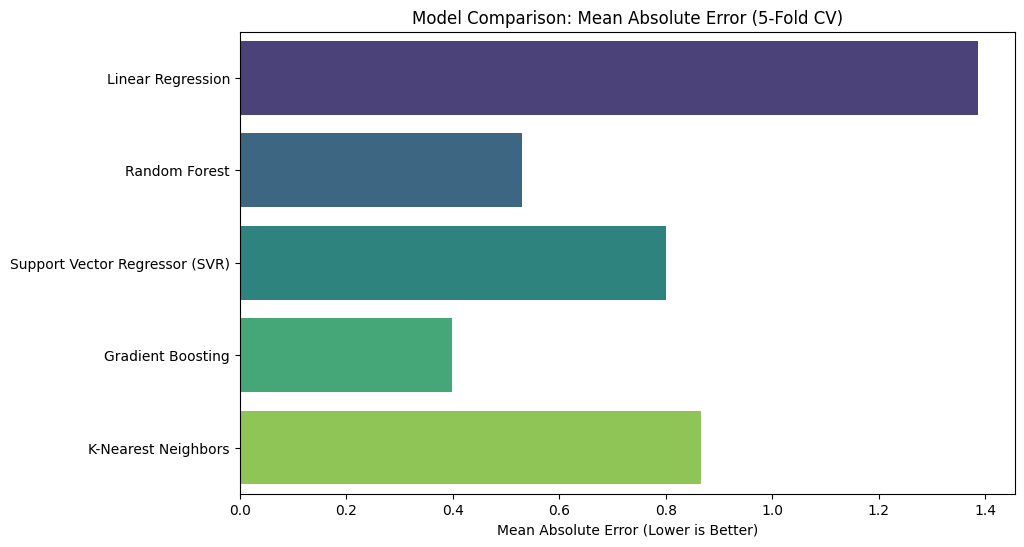

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

ds = pd.read_csv("dataset.csv")

target = 'Adsorption (cc/g)'
features = ['Pressure (kPa) ','Ash (%)','Moisture(%)','Volatile matter (%)','Fixed Carbon (%)']

X = ds[features]
y = ds[target]

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor (SVR)": SVR(C=1.0, epsilon=0.1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}
results = []
names = []
kf = KFold(n_splits=5, shuffle=True, random_state=72)

print(f"{'Model':<30} | {'MAE':<10} | {'RMSE':<10} | {'R2 Score':<10}")
print("-" * 70)

for name, model in models.items():
    # Scaling is crucial for SVR and KNN, and generally good practice
    pipeline = Pipeline([
        ('scaler', StandardScaler()), 
        ('model', model)
    ])
    
    scoring = ['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2']
    cv_results = cross_validate(pipeline, X, y, cv=kf, scoring=scoring)
    
    mae = -cv_results['test_neg_mean_absolute_error'].mean()
    rmse = -cv_results['test_neg_root_mean_squared_error'].mean()
    r2 = cv_results['test_r2'].mean()
    names.append(name)
    
    print(f"{name:<30} | {mae:<10.4f} | {rmse:<10.4f} | {r2:<10.4f}")

vsualization
plt.figure(figsize=(10, 6))
sns.barplot(x=results, y=names, palette="viridis")v
plt.xlabel("Mean Absolute Error (Lower is Better)")
plt.title("Model Comparison: Mean Absolute Error (5-Fold CV)")
plt.show()